In [18]:
import rdkit
import os
from rdkit import Chem
from rdkit import RDConfig
from rdkit.Chem import FragmentCatalog
from rdkit.Chem import rdRGroupDecomposition as rdRGD
import pandas as pd

In [19]:
f = pd.read_csv('train.csv')

In [20]:
f

,id,smiles,activity
0,0,O=[N+]([O-])C(Br)(CO)CO,1
1,1,CCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],0
2,2,O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CCN(CC(=O)O)CC(=O)O,0
3,3,CCN(CC)C(=S)SSC(=S)N(CC)CC,0
4,4,CN(C)C(=S)SSC(=S)N(C)C,0
...,...,...,...
2092,2092,Cn1c(=O)c2c(ncn2CC2OCCO2)n(C)c1=O,0
2093,2093,COc1cccc2c1cc([N+](=O)[O-])c1c(C(=O)O)cc3c(c12...,0
2094,2094,CC(C=CC=C(C)C=CC1=C(C)CCCC1(C)C)=CC=CC=C(C)C=C...,0
2095,2095,O=C(O)c1cc(-c2ccccc2)nc2ccccc12,0


In [7]:
fName=os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
fparams = FragmentCatalog.FragCatParams(1,7,fName)


In [8]:
m = Chem.MolFromSmiles(f.iloc[1, 1])
m
fcgen=FragmentCatalog.FragCatGenerator()
fcat=FragmentCatalog.FragCatalog(fparams)
num_R = fcgen.AddFragsFromMol(m,fcat)


TypeError: 'Mol' object is not callable

In [8]:
num_R

29

In [9]:
[fcat.GetEntryDescription(i) for i in range(num_R)][-1]

'CCCC[N+](C)(C)C'

In [84]:
from pysmiles import read_smiles
read_smiles('C(=O)O', explicit_hydrogen=True, reinterpret_aromatic=True)
a = read_smiles('C=C[Aaa]')
a.nodes[2]

{'charge': 0, 'hcount': 0, 'aromatic': False, 'element': 'Aaa'}

In [114]:
m1 = Chem.MolFromSmiles('BrCCc1ccccc1C(=O)O')
core = Chem.MolFromSmiles('c1ccccc1')
tmp = Chem.ReplaceCore(m1,core)
Chem.MolToSmiles(tmp)

'[1*]CCBr.[2*]C(=O)O'

In [87]:
read_smiles('[1*]CCBr.[2*]C(=O)O').nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [110]:
b = read_smiles('[A](CCBr)(C(=O)O)')

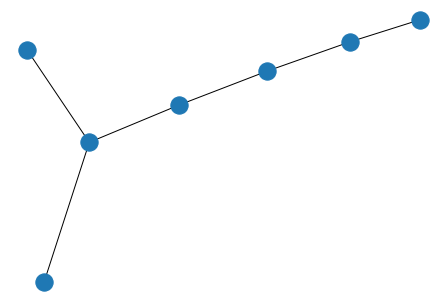

In [111]:
import networkx as nx
nx.draw(b)

In [9]:
from rdkit.Chem import ChemicalFeatures

In [10]:
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [25]:
m = Chem.MolFromSmiles('CCN(CC)C(=S)SSC(=S)N(CC)CC')
feats = factory.GetFeaturesForMol(m)
len(feats)

2

In [26]:
for i in range(len(feats)):
    print(feats[i].GetFamily())
    print(feats[i].GetType())
    print(feats[i].GetAtomIds())

Donor
SingleAtomDonor
(2,)
Donor
SingleAtomDonor
(11,)


In [22]:
unique_feat = {}
for i in range(len(f)):
    m = Chem.MolFromSmiles(f.iloc[i, 1])
    feats = factory.GetFeaturesForMol(m)
    for feat in feats:
        if feat.GetFamily() not in unique_feat:
            unique_feat[feat.GetFamily()] = 1
print(unique_feat)
print(len(unique_feat))

{'Donor': 1, 'Acceptor': 1, 'LumpedHydrophobe': 1, 'PosIonizable': 1, 'Hydrophobe': 1, 'NegIonizable': 1, 'ZnBinder': 1, 'Aromatic': 1}
8


In [24]:
unique_feat = {}
for i in range(len(f)):
    m = Chem.MolFromSmiles(f.iloc[i, 1])
    feats = factory.GetFeaturesForMol(m)
    for feat in feats:
        if feat.GetType() not in unique_feat:
            unique_feat[feat.GetType()] = len(unique_feat)
print(unique_feat)
print(len(unique_feat))

{'SingleAtomDonor': 0, 'SingleAtomAcceptor': 1, 'Nitro2': 2, 'PosN': 3, 'ChainTwoWayAttach': 4, 'AcidicGroup': 5, 'BasicGroup': 6, 'ZnBinder5': 7, 'ThreeWayAttach': 8, 'ZnBinder1': 9, 'iPropyl': 10, 'Guanidine': 11, 'ZnBinder6': 12, 'ZnBinder4': 13, 'RH6_6': 14, 'RH5_5': 15, 'tButyl': 16, 'Arom6': 17, 'Arom5': 18, 'Imidazole': 19, 'RH3_3': 20, 'RH4_4': 21, 'Arom7': 22}
23


In [27]:
m = Chem.MolFromSmiles('CCN(CC)C(=S)SSC(=S)N(CC)CC')
m2 = Chem.AddHs(m)

In [29]:
feats = factory.GetFeaturesForMol(m2)

In [31]:
for i in range(len(feats)):
    print(feats[i].GetFamily())
    print(feats[i].GetType())
    print(feats[i].GetAtomIds())

Donor
SingleAtomDonor
(2,)
Donor
SingleAtomDonor
(11,)
Hydrophobe
ThreeWayAttach
(0,)
Hydrophobe
ThreeWayAttach
(4,)
Hydrophobe
ThreeWayAttach
(13,)
Hydrophobe
ThreeWayAttach
(15,)


In [35]:
num_atom = m2.GetNumAtoms()
num_atom

36